<a href="https://colab.research.google.com/github/RegistryDev/AI-Basic/blob/master/4.6.3%20%EB%9E%9C%EB%8D%A4%20%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.6.3 랜덤 포레스트와 의사결정트리 손글씨 분류 비교

### 실습 관련 모듈(라이브러리) 임포트

In [ ]:
# sklearn에서 제공하는 "간략화 버전(8x8)"의 MNIST 손글씨 데이터 사용
from sklearn import datasets
# (참고) keras 제공의 원본 MNIST 손글씨 데이터는 28x28 크기의 6만장 -> 4.9.4에서 사용.

from sklearn import tree                                                        # 의사결정트리 실행 함수
from sklearn.ensemble import RandomForestClassifier                             # 랜덤 포레스트 실행 함수
from sklearn.model_selection import cross_val_score                             # k 폴드 교차 검증
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 손글씨 데이터 불러오기

학습 데이터 특징 수: 115008
출력 레이블 수: 1797
첫 번째 학습 데이터 특징:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

처음 5개 레이블 : 01234

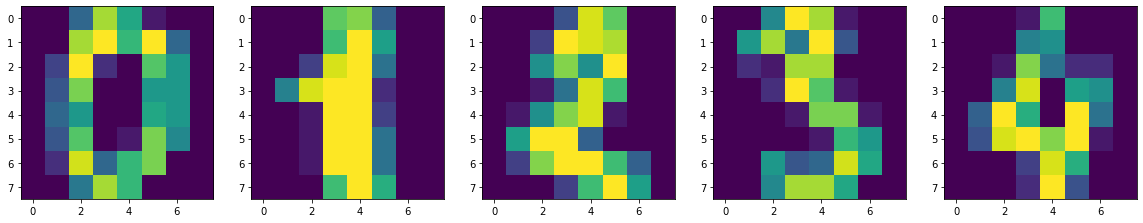

In [ ]:
# sklearn의 간략화 버전 MNIST 손글씨(숫자) 데이터 불러오기
mnist = datasets.load_digits()
# 학습 데이터와 레이블 데이터 분리. mnist.data -> features, mnist.target -> labels
features, labels = mnist.data, mnist.target

# (참고) 이 프로그램에서는 테스트 데이터는 만들지 않고, 전체를 학습 데이터로 사용한 후,
# 학습 결과 정확도만 보고자 함.

print("학습 데이터 특징 수: %d" %features.size)
# features.size / 64(=8x8) = labels.size(총 숫자 수). 계산하면 총 1,797장임.
print("출력 레이블 수: %d" %labels.size)
print("첫 번째 학습 데이터 특징:")
features0 = features[0].reshape(8, 8)
print(features0) # 첫 번째 학습 데이터 값 64개 출력

#MNIST 숫자 데이터 출력 (처음 5개만)
print("\n처음 5개 레이블 : ", end = '')                                           # end=''를 작성하면 다음 줄로 넘어가지 않음.
fig = plt.figure(figsize=(20,4))
for i in range(5):
    arr = np.array(features[i])
    arr.shape = (8, 8)
    ax = fig.add_subplot(1, 5, i + 1)                                           # (가로, 세로, 해당 subplot 번호)위치에 그림 그리기
    print(labels[i], end = '')                                                    # 출력 레이블 출력
    ax.imshow(arr)                                                              # 그림 출력

### 교차 검증

In [ ]:
# k-폴드 교차 검증 실행 함수 정의
def cross_validation(classifier, features, labels):                             # (예측기, 입력, 출력)
    cv_scores = []                                                              

    for i in range(10):                                                         # 0~9까지 10번 수행. 여기서 10은 k 폴드의 k가 아니라 단순히 10번 수행해 보겠다는 것임.
        scores = cross_val_score(
            classifier, 
            features, 
            labels, 
            cv = 10, 
            scoring = 'accuracy'                                                  # scoring : 성능평가지표는 정확도 사용.
        ) 
        cv_scores.append(scores.mean())                                         # cv=10 -> k 폴드 교차 검증의 k가 10.
    
    return cv_scores

In [ ]:
# 이 셀은 실행 완료되는데 다소 시간이 소요됨.

# 의사결정트리 학습 실행 후 정확도(10개) 저장
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
# 랜덤포레스트 학습 실행 후 정확도(10개) 저장
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)
# RandomForestClassifier에서 사용하는 의사결정트리의 수는 기본으로 100개(최대값)임.
# 트리의 수를 변경하려면 RandomForestClassifier(n_estimators=트리수)로 변경 가능함.
# 트리의 수는 최소10~최대 100까지 가능함.

### 랜덤 포레스트 VS 의사결정트리 시각화

In [ ]:
cv_list = [['random_forest', rf_cv_scores], ['decision_tree', dt_cv_scores]]
print(cv_list)
df = pd.DataFrame(cv_list)
df
#아래처럼 데이터 프레임이 표시되어 cv_list를 사용해서는 그래프로 그릴 수 없는 상태임을 알 수 있음.

[['random_forest', [0.9521322160148975, 0.9504686530105524, 0.9543606455617628, 0.9499068901303538, 0.9493544382371197, 0.9454531346989447, 0.9504748603351955, 0.9460055865921786, 0.94768156424581, 0.9487957790192425]], ['decision_tree', [0.8308100558659218, 0.8185474860335196, 0.8247206703910616, 0.8252607076350094, 0.8207759155803849, 0.8202482929857231, 0.8324736188702669, 0.8291309745499689, 0.8252389819987584, 0.8258100558659217]]]


,0,1
0,random_forest,"[0.9521322160148975, 0.9504686530105524, 0.954..."
1,decision_tree,"[0.8308100558659218, 0.8185474860335196, 0.824..."


In [ ]:
# df = pd.DataFrame.from_items(cv_list)                                         # pandas 0.23.0 버전부터 from_items 사용 불가하여
df = pd.DataFrame(dict(cv_list))                                                # 왼쪽과 같이 수정해서 사용해야 함.
print(dict(cv_list))
df

{'random_forest': [0.9521322160148975, 0.9504686530105524, 0.9543606455617628, 0.9499068901303538, 0.9493544382371197, 0.9454531346989447, 0.9504748603351955, 0.9460055865921786, 0.94768156424581, 0.9487957790192425], 'decision_tree': [0.8308100558659218, 0.8185474860335196, 0.8247206703910616, 0.8252607076350094, 0.8207759155803849, 0.8202482929857231, 0.8324736188702669, 0.8291309745499689, 0.8252389819987584, 0.8258100558659217]}


,random_forest,decision_tree
0,0.952132,0.830810
1,0.950469,0.818547
2,0.954361,0.824721
3,0.949907,0.825261
4,0.949354,0.820776
5,0.945453,0.820248
6,0.950475,0.832474
7,0.946006,0.829131
8,0.947682,0.825239
9,0.948796,0.825810


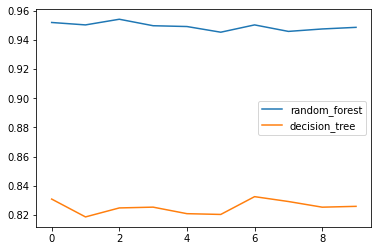

In [ ]:
df.plot()

In [ ]:
# 의사결정트리 10번 수행한 것의 정확도 평균(학습 데이터에 대한 정확도만 계산한 것임.)
print("accuracy: %.2f" %(np.mean(dt_cv_scores) * 100) + "%")

accuracy: 82.53%


In [ ]:
# 랜덤 포레스트 10번 수행한 것의 정확도 평균(학습 데이터에 대한 정확도만 계산한 것임.)
print("accuracy: %.2f" %(np.mean(rf_cv_scores) * 100) + "%")

accuracy: 94.95%
